In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import scipy.stats as ss

## EDA

In [2]:
train = pd.read_csv('prep0122255_train.csv')
train.head(5)
train = train.drop(train.columns[0], axis=1)
train

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,73.3,127.0,43.0,0.9,93.0,86.0,11568.111100,0.741,14.0
1,Developing,56.9,436.0,33.7,13.4,96.0,96.0,5714.479370,0.630,12.1
2,Developing,63.5,241.0,35.0,2.1,84.0,84.0,1862.167274,0.470,6.3
3,Developed,79.4,85.0,57.5,0.1,99.0,99.0,89739.711700,0.880,13.5
4,Developing,74.5,14.0,55.0,0.1,94.0,94.0,3161.529350,0.798,12.0
...,...,...,...,...,...,...,...,...,...,...
1759,Developing,74.4,111.0,49.2,0.1,85.0,85.0,1657.322800,0.775,15.3
1760,Developing,63.8,247.0,18.9,1.3,97.0,93.0,617.317648,0.464,10.2
1761,Developing,69.7,28.0,48.2,2.0,87.0,86.0,3681.599300,0.668,12.6
1762,Developed,79.7,82.0,57.9,0.1,99.0,96.0,1618.492800,0.877,13.5


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1764 non-null   object 
 1   Life expectancy                  1764 non-null   float64
 2   Adult Mortality                  1764 non-null   float64
 3   BMI                              1764 non-null   float64
 4   HIV/AIDS                         1764 non-null   float64
 5   Diphtheria                       1764 non-null   float64
 6   Polio                            1764 non-null   float64
 7   GDP                              1764 non-null   float64
 8   Income composition of resources  1764 non-null   float64
 9   Schooling                        1764 non-null   float64
dtypes: float64(9), object(1)
memory usage: 137.9+ KB
None


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Life expectancy,1764.0,69.593651,9.610978,39.00000,63.500000,72.400000,76.100000,89.0000
Adult Mortality,1764.0,159.693311,125.207161,1.00000,69.000000,135.000000,221.000000,723.0000
BMI,1764.0,38.558503,19.791448,1.40000,19.500000,44.200000,56.225000,77.6000
HIV/AIDS,1764.0,1.807370,5.171301,0.10000,0.100000,0.100000,0.800000,50.3000
Diphtheria,1764.0,83.147959,22.756777,2.00000,80.500000,93.000000,97.000000,99.0000
Polio,1764.0,83.202948,22.478721,3.00000,78.750000,93.000000,97.000000,99.0000
GDP,1764.0,7624.314387,14706.912934,1.68135,472.954181,1846.393295,5935.136533,119172.7418
Income composition of resources,1764.0,0.636972,0.208750,0.00000,0.501000,0.687000,0.788000,0.9480
Schooling,1764.0,12.212925,3.229011,0.00000,10.300000,12.400000,14.500000,20.7000


In [5]:
print("Null values:\n", train.isnull().sum())

Null values:
 Status                             0
Life expectancy                    0
Adult Mortality                    0
BMI                                0
HIV/AIDS                           0
Diphtheria                         0
Polio                              0
GDP                                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [6]:
print("Percent missingness:\n", train.isnull().sum() / train.count())

Percent missingness:
 Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
BMI                                0.0
HIV/AIDS                           0.0
Diphtheria                         0.0
Polio                              0.0
GDP                                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


In [7]:
print("Shape:\n", train.shape)

Shape:
 (1764, 10)


In [8]:
print("Data Types:\n", train.dtypes)

Data Types:
 Status                              object
Life expectancy                    float64
Adult Mortality                    float64
BMI                                float64
HIV/AIDS                           float64
Diphtheria                         float64
Polio                              float64
GDP                                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [9]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='plasma', low=.5, high=0).highlight_null('red')

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
Life expectancy,1.000000,-0.680039,0.579843,-0.573809,0.460227,0.454672,0.452266,0.735329,0.765111
Adult Mortality,-0.680039,1.000000,-0.373460,0.558935,-0.235285,-0.235386,-0.287016,-0.447513,-0.435558
BMI,0.579843,-0.373460,1.000000,-0.249146,0.270032,0.262376,0.286214,0.536440,0.590213
HIV/AIDS,-0.573809,0.558935,-0.249146,1.000000,-0.156163,-0.156732,-0.134290,-0.264786,-0.239596
Diphtheria,0.460227,-0.235285,0.270032,-0.156163,1.000000,0.660510,0.191819,0.406000,0.442732
Polio,0.454672,-0.235386,0.262376,-0.156732,0.660510,1.000000,0.202257,0.385762,0.434624
GDP,0.452266,-0.287016,0.286214,-0.134290,0.191819,0.202257,1.000000,0.456435,0.449135
Income composition of resources,0.735329,-0.447513,0.536440,-0.264786,0.406000,0.385762,0.456435,1.000000,0.797092
Schooling,0.765111,-0.435558,0.590213,-0.239596,0.442732,0.434624,0.449135,0.797092,1.000000


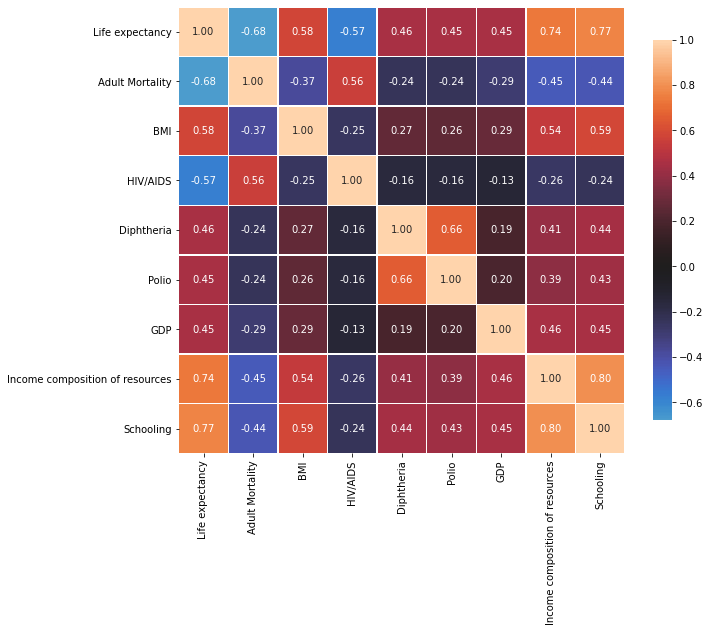

In [10]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

In [11]:
train.columns

Index(['Status', 'Life expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [12]:
train['Status'].value_counts()

Developing    1432
Developed      332
Name: Status, dtype: int64

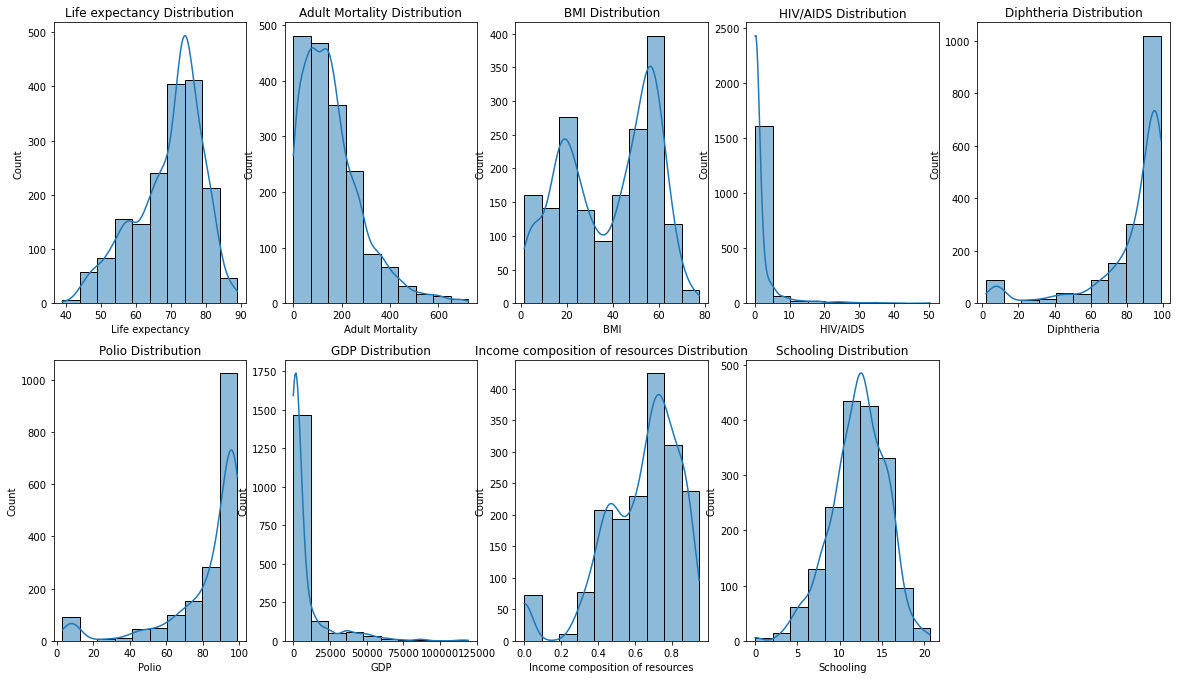

In [13]:
col=['Life expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income composition of resources',
       'Schooling']

dic={}

for i in range(len(col)):
    dic[col[i]]=i+1

plt.figure(figsize=(20,30))

for key,val in dic.items():
    plt.subplot(5,5,val)
    sns.histplot(x=train[key],data=train,bins=10,kde=True)
    plt.xlabel(key)
    plt.title(key+' Distribution')

plt.show()

## outliers 

In [14]:
#printing out the number of outliers and its percentage

def outlier_count(col, data=train):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

for col in col:
    outlier_count(col)

---------------Life expectancy---------------
Number of outliers: 13
Percent of data that is outlier: 0.74%
---------------Adult Mortality---------------
Number of outliers: 57
Percent of data that is outlier: 3.23%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------HIV/AIDS---------------
Number of outliers: 325
Percent of data that is outlier: 18.42%
---------------Diphtheria---------------
Number of outliers: 181
Percent of data that is outlier: 10.26%
---------------Polio---------------
Number of outliers: 156
Percent of data that is outlier: 8.84%
---------------GDP---------------
Number of outliers: 258
Percent of data that is outlier: 14.63%
---------------Income composition of resources---------------
Number of outliers: 73
Percent of data that is outlier: 4.14%
---------------Schooling---------------
Number of outliers: 19
Percent of data that is outlier: 1.08%


In [15]:
#renaming the columns 
train.rename(columns={"Life expectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "Income composition of resources":"Income_Comp_Of_Resources"},inplace=True)
# train.columns

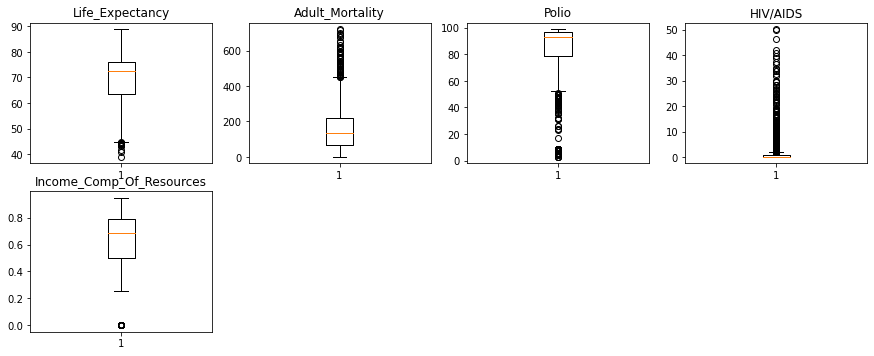

In [16]:
#checking outliers in the dataset 
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(train[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [17]:
features_with_outliers = [ 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling']
for feature in features_with_outliers:
    q1 = train[feature].quantile(0.25)#the median of the lower half 
    q3 = train[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    train.loc[train[feature]<lower_limit,feature] = lower_limit
    train.loc[train[feature]>upper_limit,feature] = upper_limit

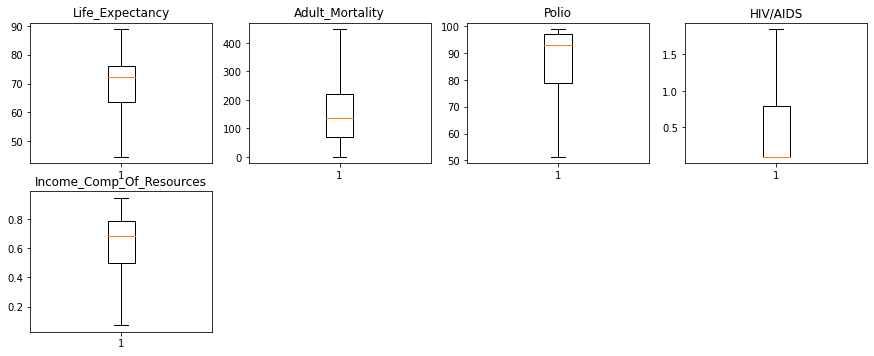

In [18]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(train[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Status'] = labelencoder.fit_transform(train['Status'])
train['Life_Expectancy'] = np.where(train['Life_Expectancy']>=65, True, False)

In [20]:
y = train.pop('Life_Expectancy')
X = train

In [21]:
X

,Status,Adult_Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income_Comp_Of_Resources,Schooling
0,1,127.0,43.0,0.90,93.0,86.0,11568.111100,0.741,14.0
1,1,436.0,33.7,1.85,96.0,96.0,5714.479370,0.630,12.1
2,1,241.0,35.0,1.85,84.0,84.0,1862.167274,0.470,6.3
3,0,85.0,57.5,0.10,99.0,99.0,14128.410061,0.880,13.5
4,1,14.0,55.0,0.10,94.0,94.0,3161.529350,0.798,12.0
...,...,...,...,...,...,...,...,...,...
1759,1,111.0,49.2,0.10,85.0,85.0,1657.322800,0.775,15.3
1760,1,247.0,18.9,1.30,97.0,93.0,617.317648,0.464,10.2
1761,1,28.0,48.2,1.85,87.0,86.0,3681.599300,0.668,12.6
1762,0,82.0,57.9,0.10,99.0,96.0,1618.492800,0.877,13.5


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lm = LogisticRegression()
model = lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [27]:
print("Logistic Regression model accuracy(in %):",accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 94.61756373937678


In [29]:
Conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,79,14
Actual Positive,5,255


In [79]:
print("Accuracy of LG is = ",lm.score(x_train,y_train))
print("ROC of LG is = ",roc_auc_score(y_test, y_pred))

Accuracy of LG is =  0.933380581148122
ROC of LG is =  0.9043631100082713


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.83      0.88        93
        True       0.94      0.98      0.96       260

    accuracy                           0.94       353
   macro avg       0.94      0.90      0.92       353
weighted avg       0.94      0.94      0.94       353



## Test Data

In [93]:
test = pd.read_csv('prep0122255_test.csv')
# test.head(5)
test = test.drop(test.columns[0], axis=1)
test

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,75.7,13.0,59.4,0.1,95.0,95.0,7748.123310,0.738,12.5
1,Developing,69.0,265.0,15.8,0.6,85.0,8.0,274.819723,0.473,8.9
2,Developing,72.6,11.0,45.0,0.1,97.0,97.0,1175.788981,0.656,10.7
3,Developing,73.7,133.0,32.5,0.1,97.0,97.0,7269.171140,0.736,12.3
4,Developing,63.3,241.0,16.4,1.2,69.0,7.0,468.567249,0.422,8.4
...,...,...,...,...,...,...,...,...,...,...
436,Developing,75.0,138.0,5.5,0.5,94.0,94.0,4682.728424,0.721,12.7
437,Developed,81.9,7.0,23.4,0.1,97.0,97.0,3488.399200,0.863,14.8
438,Developing,74.5,128.0,54.4,0.1,93.0,94.0,4274.376857,0.755,13.5
439,Developed,81.1,7.0,65.9,0.1,93.0,93.0,3997.256240,0.904,19.5


In [94]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           441 non-null    object 
 1   Life expectancy                  441 non-null    float64
 2   Adult Mortality                  441 non-null    float64
 3   BMI                              441 non-null    float64
 4   HIV/AIDS                         441 non-null    float64
 5   Diphtheria                       441 non-null    float64
 6   Polio                            441 non-null    float64
 7   GDP                              441 non-null    float64
 8   Income composition of resources  441 non-null    float64
 9   Schooling                        441 non-null    float64
dtypes: float64(9), object(1)
memory usage: 34.6+ KB
None


In [95]:
print("Null values:\n", test.isnull().sum())

Null values:
 Status                             0
Life expectancy                    0
Adult Mortality                    0
BMI                                0
HIV/AIDS                           0
Diphtheria                         0
Polio                              0
GDP                                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [96]:
print("Shape:\n", test.shape)

Shape:
 (441, 10)


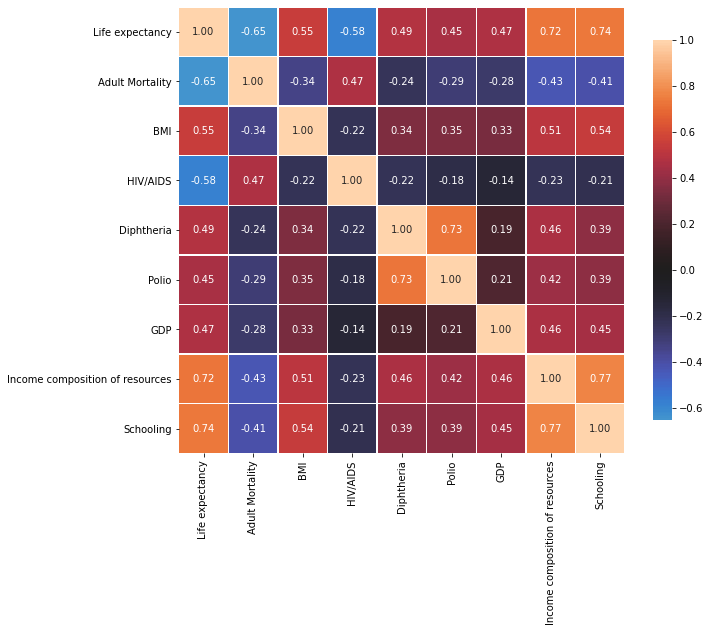

In [97]:
def correlation_heatmap(test):
    correlations = test.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test)

In [98]:
#renaming the columns 
test.rename(columns={"Life expectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "Income composition of resources":"Income_Comp_Of_Resources"},inplace=True)
test.columns

Index(['Status', 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

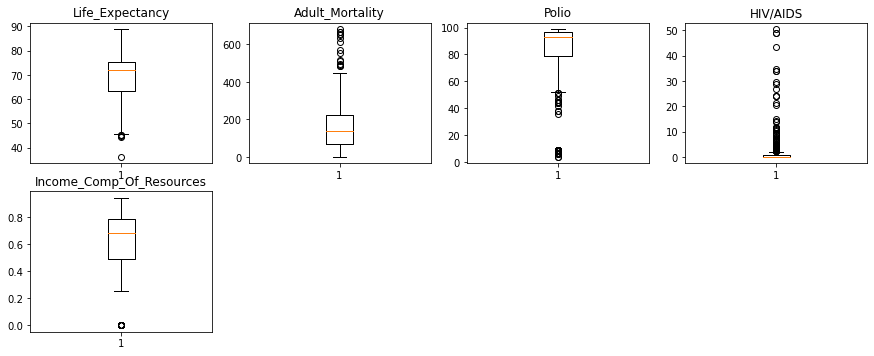

In [99]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(test[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [100]:
features_with_outliers = [ 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling']
for feature in features_with_outliers:
    q1 = test[feature].quantile(0.25)#the median of the lower half 
    q3 = test[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    test.loc[test[feature]<lower_limit,feature] = lower_limit
    test.loc[test[feature]>upper_limit,feature] = upper_limit

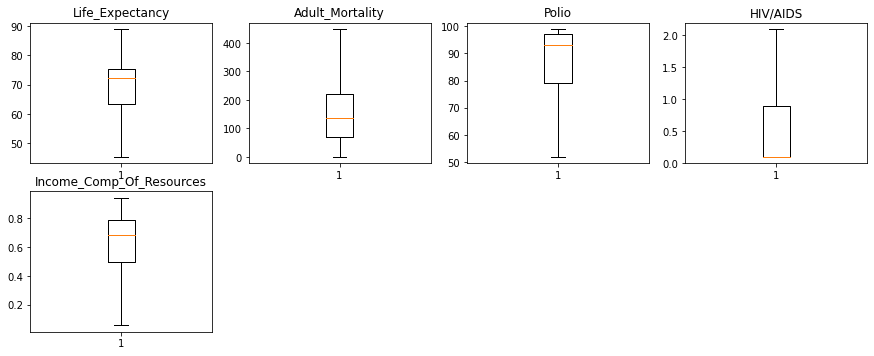

In [101]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(test[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [102]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() 
test['Status'] = labelencoder.fit_transform(test['Status'])
test['Life_Expectancy'] = np.where(test['Life_Expectancy']>=65, 1, 0) # True = 1 Flase = 0 

In [103]:

y = test.pop('Life_Expectancy')
X = test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lm = LogisticRegression()
model = lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [104]:
print("Logistic Regression model accuracy(in %):",accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 93.25842696629213


In [105]:
Conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,26,2
Actual Positive,4,57


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.97      0.93      0.95        61

    accuracy                           0.93        89
   macro avg       0.92      0.93      0.92        89
weighted avg       0.93      0.93      0.93        89



In [107]:
print("Accuracy of LR is = ",lm.score(x_train,y_train))
print("test R2 Score is = ",r2_score(y_test,y_pred))
print("test Mean Squared Error = ",mean_squared_error(y_test,y_pred))
print("test Mean absolute Squared Error = ",mean_absolute_error(y_test,y_pred))

Accuracy of LR is =  0.9659090909090909
test R2 Score is =  0.6873536299765808
test Mean Squared Error =  0.06741573033707865
test Mean absolute Squared Error =  0.06741573033707865
